### **Applying the concept of Outlier detection by using Percentile Detection and Outlier treatment both by Capping and Trimming**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data = pd.read_csv('/content/weight-height.csv')

In [30]:
data.shape

(10000, 3)

In [31]:
data.sample(6)

,Gender,Height,Weight
4715,Male,71.775023,189.639306
1925,Male,67.973350,185.025057
9276,Female,64.604267,165.365826
7172,Female,64.799394,146.036840
857,Male,69.898086,195.758935
2218,Male,67.511358,176.085424


In [32]:
data['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

#### **Checking  the distribution**

<ipython-input-38-638de759d4c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Height'], color='pink')


<Axes: xlabel='Height', ylabel='Density'>

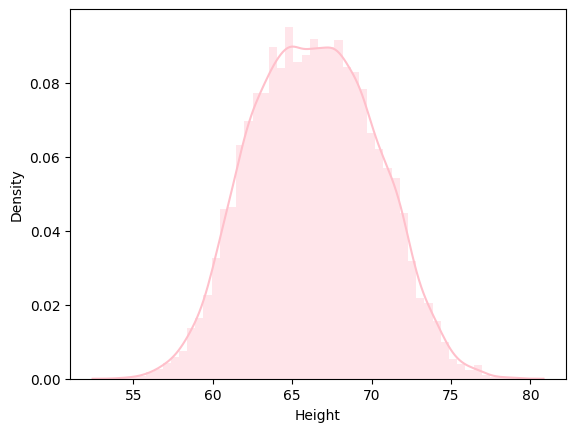

In [38]:
sns.distplot(data['Height'], color='pink')


<Axes: ylabel='Height'>

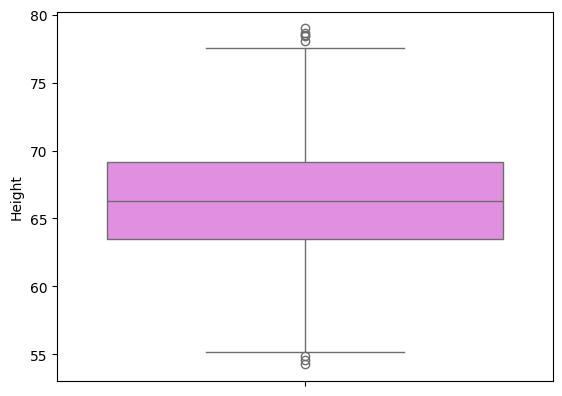

In [39]:
sns.boxplot(data['Height'], color='violet')

In [40]:
data['Height'].skew()

0.04936908937689031

In [41]:
data['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

#### **Deciding the threshold value**

In [43]:
upper_limit = data['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [44]:
lower_limit = data['Height'].quantile(0.01)
lower_limit

58.13441158671655

### **Applying Outliers Treatment**

#### **1.Trimming**

In [45]:
new_data = data[(data['Height'] <= 74.78) & (data['Height'] >= 58.13)]

In [46]:
new_data['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

#### **Comparing the visualization after and before removing outliers**

<ipython-input-47-b21b9802c050>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Height'])
<ipython-input-47-b21b9802c050>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['Height'])


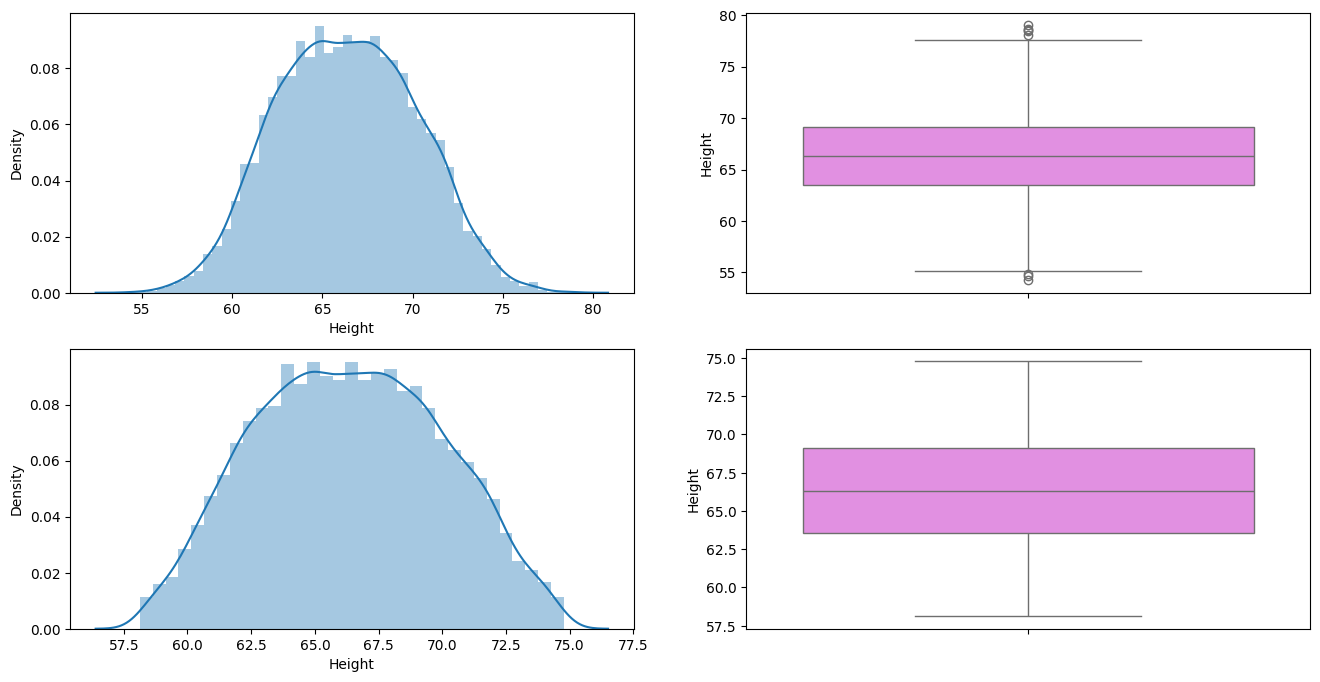

In [47]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Height'])

plt.subplot(2,2,2)
sns.boxplot(data['Height'], color='violet')

plt.subplot(2,2,3)
sns.distplot(new_data['Height'])

plt.subplot(2,2,4)
sns.boxplot(new_data['Height'], color='violet')

plt.show()

#### **2.Capping(Here Winsorization)**

In [57]:
data['Height'] = np.where(data['Height'] >= upper_limit,
        upper_limit,
        np.where(data['Height'] <= lower_limit,
        lower_limit,
        data['Height']))

In [59]:
data.shape

(10000, 3)

In [61]:
data['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<ipython-input-62-1b173cedcd40>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

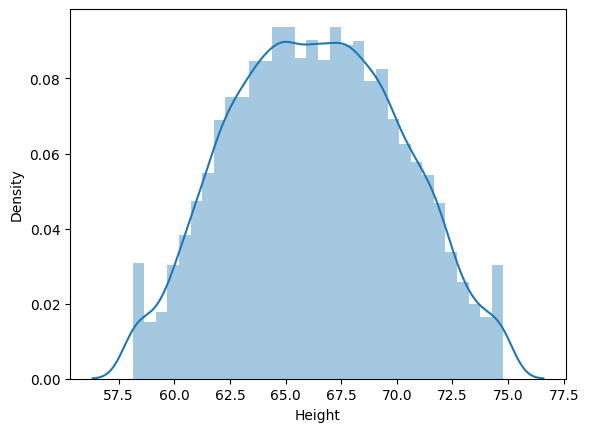

In [62]:
sns.distplot(data['Height'])

<Axes: ylabel='Height'>

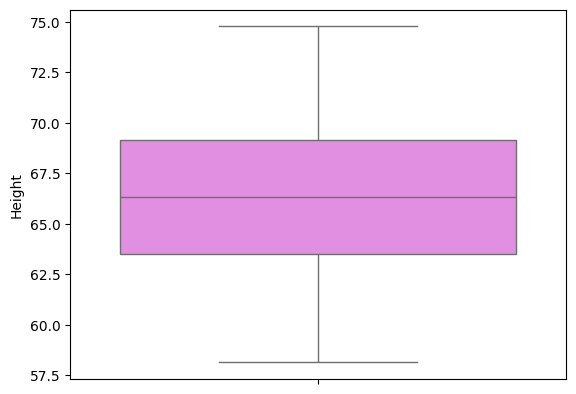

In [63]:
sns.boxplot(data['Height'], color='violet')